# Load and Explore the Data

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
# Load data set
df = pd.read_excel("dataset/online_retail_II.xlsx")
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [16]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [17]:
#checking the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [18]:
#checking missing values
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [19]:
#Handle Missing Values
#Removing rows where Customer ID is missing.

df.dropna(subset=["Customer ID"], inplace=True)
print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [43]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010-12
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010-12


# Data Cleaning and Transformation

In [49]:
#Create a New Column for Total Price
df['TotalPrice'] = df['Quantity'] * df['Price']


In [50]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice', 'YearMonth'],
      dtype='object')

In [51]:
#remove negative or refund transactions
df = df[df['Quantity'] > 0]

In [52]:
#Checking for Duplicate Entries
df.drop_duplicates(inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010-12
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010-12



# Exploratory Data Analysis


# i. Top 10 best selling products

In [40]:
topSelling = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(topSelling)

Description
WHITE HANGING HEART T-LIGHT HOLDER    56814
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54610
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45129
ASSORTED COLOUR BIRD ORNAMENT         44431
60 TEATIME FAIRY CAKE CASES           35656
PACK OF 60 PINK PAISLEY CAKE CASES    30871
JUMBO BAG RED RETROSPOT               29519
SMALL POPCORN HOLDER                  25703
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


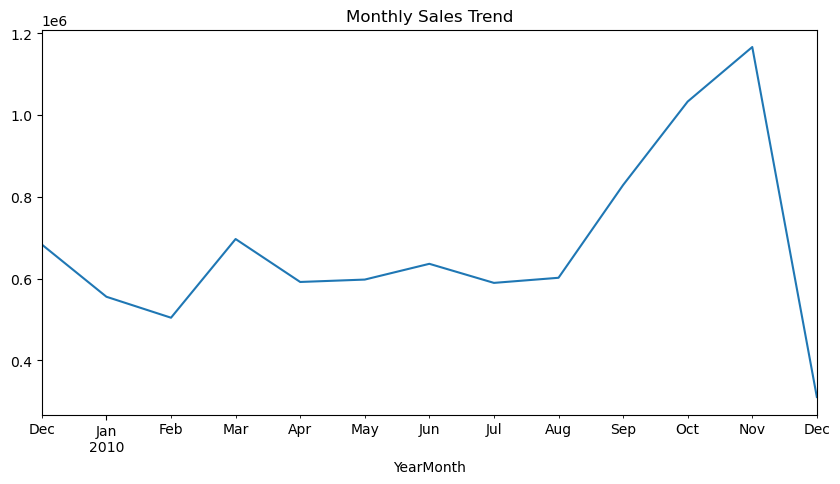

In [53]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), title="Monthly Sales Trend")
plt.show()

# ii. Top 10 Customers by Spending

In [55]:
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer ID
18102.0    349164.35
14646.0    248396.50
14156.0    196549.74
14911.0    152121.22
13694.0    131443.19
17511.0     84541.17
15061.0     83284.38
16684.0     80489.21
16754.0     65500.07
17949.0     60117.60
Name: TotalPrice, dtype: float64


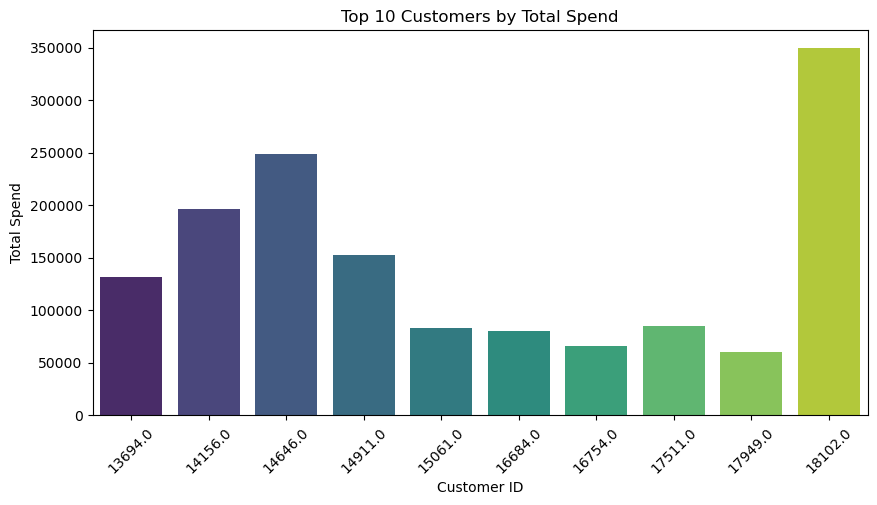

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")

# Labels & Title
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.title("Top 10 Customers by Total Spend")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()